<a href="https://colab.research.google.com/github/BIRDRED/datascience/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas
import numpy as np
import sklearn.linear_model as lm
from sklearn import preprocessing, model_selection, metrics
import matplotlib.pyplot as plt
from sklearn import tree
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn import metrics
import seaborn as sns



In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from IPython.display import display


#Pré-Processamento

In [5]:
df_payment = pandas.read_csv('/content/drive/MyDrive/Pós-Graduação/Aprendizados de Dados em Tempo Real/Dados/Online_Payment_log.csv', sep=",")

In [6]:
df_payment.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
la=LabelEncoder()
df_payment['type']=la.fit_transform(df_payment['type'])

In [8]:
df_payment.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [9]:
df_payment['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
target_col = 'isFraud'

# Árvores de Decisão

In [11]:
dictFraud = {0: 'Não foi Fraude',1 : 'Foi Fraude'}
df_payment['label_Fraud'] = df_payment['isFraud'].map(dictFraud)

In [12]:
fraud_label_map = df_payment[['label_Fraud', 'isFraud']].drop_duplicates()


In [13]:
fraud_label_map.label_Fraud

0    Não foi Fraude
2        Foi Fraude
Name: label_Fraud, dtype: object

In [14]:
df_payment.drop(['label_Fraud'],axis=1,inplace=True)

In [15]:
Y = df_payment[target_col]
X = df_payment.drop(target_col, axis=1)

# train/test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size=0.2)

df_train = xtrain.copy()
df_test = xtest.copy()
df_train['train_set'] = 1
df_test['train_set'] = 0
df_train[target_col] = ytrain
df_test[target_col] = ytest

In [16]:
model_payment = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)
model_payment.fit(xtrain, ytrain)      
df_train['decision'] = model_payment.predict(xtrain)
df_test['decision']  = model_payment.predict(xtest)
df_train['probability'] = model_payment.predict_proba(xtrain)[:,1]
df_test['probability']  = model_payment.predict_proba(xtest)[:,1]

df_payment = pandas.concat((df_train, df_test), axis=0)

[Text(0, 0.5, 'Não foi Fraude'), Text(0, 1.5, 'Foi Fraude')]

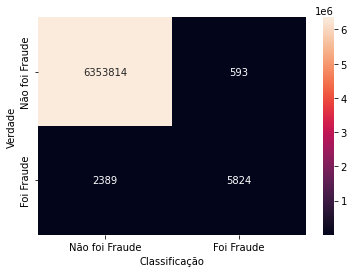

In [17]:
cm = metrics.confusion_matrix(df_payment[target_col],
                              df_payment['decision'])

sns.heatmap(cm, annot=True, fmt = '.0f')

plt.xlabel('Classificação')
plt.ylabel('Verdade')
plt.gca().set_xticklabels(fraud_label_map.label_Fraud.values)
plt.gca().set_yticklabels(fraud_label_map.label_Fraud.values)

In [18]:
print(metrics.classification_report(df_payment[target_col],
                              df_payment['decision'],
                              target_names = fraud_label_map.label_Fraud))

                precision    recall  f1-score   support

Não foi Fraude       1.00      1.00      1.00   6354407
    Foi Fraude       0.91      0.71      0.80      8213

      accuracy                           1.00   6362620
     macro avg       0.95      0.85      0.90   6362620
  weighted avg       1.00      1.00      1.00   6362620



In [19]:
df_payment[df_payment['train_set'] == 1]['decision'].value_counts()/df_payment[df_payment['train_set'] == 1]['isFraud'].value_counts()

0    1.000285
1    0.778947
dtype: float64

#Regressão Logistica

In [21]:
df_payment = pandas.read_csv('/content/drive/MyDrive/Pós-Graduação/Aprendizados de Dados em Tempo Real/Dados/Online_Payment_log.csv', sep=",")

In [22]:
df_payment.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
la=LabelEncoder()
df_payment['type']=la.fit_transform(df_payment['type'])

In [24]:
df_payment.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [25]:
df_payment['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [26]:
target_col = 'isFraud'

In [27]:
df_payment.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [28]:
model_map = {
    'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear'),
    'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear'),
    'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga'),
}

# solver : 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

Y = df_payment[target_col]
X = df_payment.drop(target_col, axis=1)

# train/test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size=0.2)

df_train = xtrain.copy()
df_test = xtest.copy()
df_train['train_set'] = 1
df_test['train_set'] = 0
df_train[target_col] = ytrain
df_test[target_col] = ytest

for modelname, model in model_map.items():
    model.fit(xtrain, ytrain)      
    yhat_train = model.predict(xtrain)
    yhat_test  = model.predict(xtest)
    # Output table
    df_train[modelname] = yhat_train
    df_test[modelname] = yhat_test
    model_map[modelname] = model
    
df_payment = pandas.concat((df_train, df_test), axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [38]:
df_payment[df_payment['train_set'] == 1]['isFraud'].value_counts()

0    5083546
1       6550
Name: isFraud, dtype: int64

In [32]:
df_payment.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,train_set,isFraud,log_l1,log_l2,log_el
4843913,347,1,14016.88,22857.4,8840.52,1226512.32,1240529.21,1,0,0,0,0
407950,18,0,153004.02,4035.0,157039.02,741809.58,1038993.87,1,0,0,0,0
2882950,228,3,10370.05,0.0,0.00,0.00,0.00,1,0,0,0,0
5566389,393,1,97755.04,0.0,0.00,1424211.18,1521966.22,1,0,0,0,0
5046743,354,4,1158706.95,0.0,0.00,2432615.01,3591321.96,1,0,0,0,0


In [40]:
df_payment[df_payment['train_set'] == 1]['log_el'].value_counts()

0    5090096
Name: log_el, dtype: int64

In [41]:
df_payment[df_payment['train_set'] == 1]['log_l1'].value_counts()

0    5086547
1       3549
Name: log_l1, dtype: int64

In [42]:
df_payment[df_payment['train_set'] == 1]['log_l2'].value_counts()

0    5088005
1       2091
Name: log_l2, dtype: int64

In [43]:
idx = df_payment['train_set'] == 0

print('log_l1\t', metrics.accuracy_score(df_payment[idx][target_col], df_payment[idx]['log_l1']>0.5))
print('log_l2\t', metrics.accuracy_score(df_payment[idx][target_col], df_payment[idx]['log_l2']>0.5))
print('log_el\t', metrics.accuracy_score(df_payment[idx][target_col], df_payment[idx]['log_el']>0.5))
print('Total Real Alta Qualidade:', df_payment[idx][target_col].sum())
df_payment[idx].groupby(target_col)[list(model_map.keys())].sum()


log_l1	 0.9992330203595374
log_l2	 0.9989092543637684
log_el	 0.9986931484199905
Total Real Alta Qualidade: 1663


,log_l1,log_l2,log_el
isFraud,,,
0,80,124,0
1,767,399,0


In [44]:
def plot_coefs(modelname, class_label):
    fig = plt.figure(figsize=(15,4))
    
    iclass = 0
    if class_label != '':
        idx  = target_label_map.target_label==class_label
        iclass = target_label_map.loc[idx, 'target'].values[0]
    
    coefs = model_map[modelname].coef_[iclass]
    coef_names = xtrain.columns

    idx = np.argsort(coefs)

    plt.bar(np.arange(coefs.shape[0]), coefs[idx])
    plt.xticks(np.arange(coefs.shape[0]), coef_names[idx], rotation='90')
    plt.title('Coeficientes do modelo '+ modelname + ' ' + class_label)
    plt.grid()
    plt.xlim((-0.5, coefs.shape[0]-0.5))
    plt.show()


interact(plot_coefs, modelname = list(model_map.keys()), class_label = fixed(''))

interactive(children=(Dropdown(description='modelname', options=('log_l1', 'log_l2', 'log_el'), value='log_l1'…

<function __main__.plot_coefs>